## Fit ranking

In [ ]:
# import ROOT
# from pyamptools import atiSetup
# import os
# # os.chdir("/work/halld/home/dbarton/gluex/KShortPipLambda")
# os.chdir("/volatile/halld/home/dbarton/pipkslamb/data/fall2018/flatten")
# os.listdir()
# atiSetup.setup(globals(), use_fsroot=True)

## Stastical distribution of LogL

In [ ]:
# #!/usr/bin/env python3
# import os
# import pandas as pd
# import numpy as np
# import matplotlib as mpl
# import matplotlib.pyplot as plt

# baseDir  = "/work/halld/home/dbarton/gluex/KShortPipLambda/sdme/"
# fileName = baseDir + "fits/fit_ranking.txt"
# outFile  = baseDir + "fits/fit_ranking.xlsx"
# pdfOut   = baseDir + "plots/fit_loglikelihood_distribution.pdf"

# # -----------------------------
# # GlueX style (for Matplotlib)
# # -----------------------------
# def gluex_style():
#     mpl.rcParams["figure.figsize"] = (8.0, 6.0)
#     mpl.rcParams["font.family"] = ["DejaVu Sans"]
#     mpl.rcParams["font.size"] = 12
#     mpl.rcParams["axes.titlesize"] = 18
#     mpl.rcParams["axes.labelsize"] = 14
#     mpl.rcParams["xtick.labelsize"] = 12
#     mpl.rcParams["ytick.labelsize"] = 12
#     mpl.rcParams["lines.linewidth"] = 2.0
#     mpl.rcParams["axes.spines.top"] = False
#     mpl.rcParams["axes.spines.right"] = False
#     mpl.rcParams["axes.linewidth"] = 1.2
#     mpl.rcParams["xtick.direction"] = "in"
#     mpl.rcParams["ytick.direction"] = "in"
#     mpl.rcParams["xtick.major.size"] = 6
#     mpl.rcParams["ytick.major.size"] = 6
#     mpl.rcParams["xtick.minor.size"] = 3
#     mpl.rcParams["ytick.minor.size"] = 3
#     mpl.rcParams["axes.grid"] = False
#     # To suppress scientific offsets:
#     # mpl.rcParams["axes.formatter.useoffset"] = False
#     # mpl.rcParams["axes.formatter.limits"] = (-5, 5)

# def set_gluex_margins(ax=None):
#     plt.subplots_adjust(left=0.20, right=0.92, top=0.95, bottom=0.15)
#     if ax is None:
#         ax = plt.gca()
#     ax.tick_params(which="both", direction="in")
#     return ax

# gluex_style()

# # --- Read table ---
# df = pd.read_csv(
#     fileName,
#     comment="#",
#     sep=r"\s+",
#     header=None,
#     names=["RunNo", "Success", "FitStatus", "eMatrix", "LogL"],
#     engine="python"
# )

# # Clean and convert data types
# df["Success"]   = df["Success"].astype(str).str.strip().str.upper()
# df["FitStatus"] = pd.to_numeric(df["FitStatus"], errors="coerce")
# df["eMatrix"]   = pd.to_numeric(df["eMatrix"],   errors="coerce")
# df["LogL"]      = pd.to_numeric(df["LogL"],      errors="coerce")
# df = df.dropna(subset=["LogL"])

# # Save DataFrame to Excel
# os.makedirs(os.path.dirname(outFile), exist_ok=True)
# df.to_excel(outFile, index=False)

# # --- Filter to successful fits ---
# df_filtered = df[df["Success"].str.startswith("Y")].copy()

# if df_filtered.empty:
#     print("No successful fits found after filtering (Success == 'Y').")
#     print("Unique Success values:", pd.unique(df["Success"]))
# else:
#     print(f"Number of successful fits: ({len(df_filtered)}/{len(df)}) {len(df_filtered)/len(df)*100:.2f}%")

#     # --- Normalize to the MOST NEGATIVE LogL (the minimum) ---
#     min_logl = df_filtered["LogL"].min()
#     df_filtered["norm_LogL"] = df_filtered["LogL"] - min_logl
#     norm_logl       = df_filtered["norm_LogL"]
#     norm_logl_min   = norm_logl.min()      # should be 0
#     norm_logl_mean  = norm_logl.mean()
#     sigma           = norm_logl.std(ddof=0)

#     print(f"min norm_LogL = {norm_logl_min:.6f} (should be 0),  σ = {sigma:.6f}")
#     print(f"Min LogL (used for normalization): {min_logl:.6f}")

#     within_1sigma = ((norm_logl - norm_logl_mean).abs() <= sigma).mean()*100
#     print(f"Percentage within 1σ: {within_1sigma:.2f}%")

#     # --- Plot ---
#     fig, ax = plt.subplots(figsize=(8, 6))
#     set_gluex_margins(ax)

#     ax.hist(
#         norm_logl,
#         bins=20,
#         edgecolor="blue",
#         facecolor="lightblue",
#         linewidth=2.0,
#         density=False
#     )

#     for n in range(1, 4):
#         ax.axvline(norm_logl_mean - n*sigma, color="gray", linestyle="--", linewidth=1.2, alpha=0.8)
#         ax.axvline(norm_logl_mean + n*sigma, color="gray", linestyle="--", linewidth=1.2, alpha=0.8)
#     ax.axvline(0, color="black", linestyle="-", linewidth=1.5, label="Best fit (ΔLogL = 0)")
#     ymax = ax.get_ylim()[1]

#     for n, label in zip([1, 2, 3], ["1σ", "2σ", "3σ"]):
#         ax.axvline(norm_logl_mean + n*sigma, color="gray", linestyle="--", linewidth=1.2, alpha=0.8)
#         ax.axvline(norm_logl_mean - n*sigma, color="gray", linestyle="--", linewidth=1.2, alpha=0.8)
#         ax.text(norm_logl_mean + n*sigma, ymax*0.92, label,
#                 rotation=90, ha="left", va="top", fontsize=20, color="red")

#     text = (
#         rf"Conv. fits: ${len(df_filtered)}$" + "\n"
#         rf"Total fits: ${len(df)}$" + "\n"
#         rf"$\sigma = {sigma:.4f}$" + "\n"
#         rf"Within $1\sigma$: {within_1sigma:.1f}%"
#     )
#     ax.text(
#         0.97, 0.95, text,
#         transform=ax.transAxes,
#         ha="right", va="top",
#         fontsize=11,
#         bbox=dict(boxstyle="round,pad=0.35", facecolor="white", alpha=0.9, edgecolor="0.6")
#     )

#     ax.set_xlabel("Normalized Log-Likelihood:  $\\Delta\\mathrm{LogL} = \\mathrm{LogL} - \\min(\\mathrm{LogL})$")
#     ax.set_ylabel("Counts")
#     ax.set_title("Converged fits only")

#     plt.tight_layout()
#     os.makedirs(os.path.dirname(pdfOut), exist_ok=True)
#     plt.savefig(pdfOut)
#     print(f"Saved PDF: {pdfOut}")
#     plt.show()


## Log Liklihood ratio statistics

Number of successful fits: (1188/2000) 59.40%
Min LogL (used for normalization): -7763.047900
Min ΔLogL = 0.000000 (should be 0)
Fraction with Δ(-2lnL) ≤ 1.0 (1σ): 83.33%
Fraction with Δ(-2lnL) ≤ 4.0 (2σ): 83.42%
Fraction with Δ(-2lnL) ≤ 9.0 (3σ): 83.50%
Saved zoomed PDF: /work/halld/home/dbarton/gluex/KShortPipLambda/sdme/plots/fit_loglikelihood_distribution_zoom.pdf


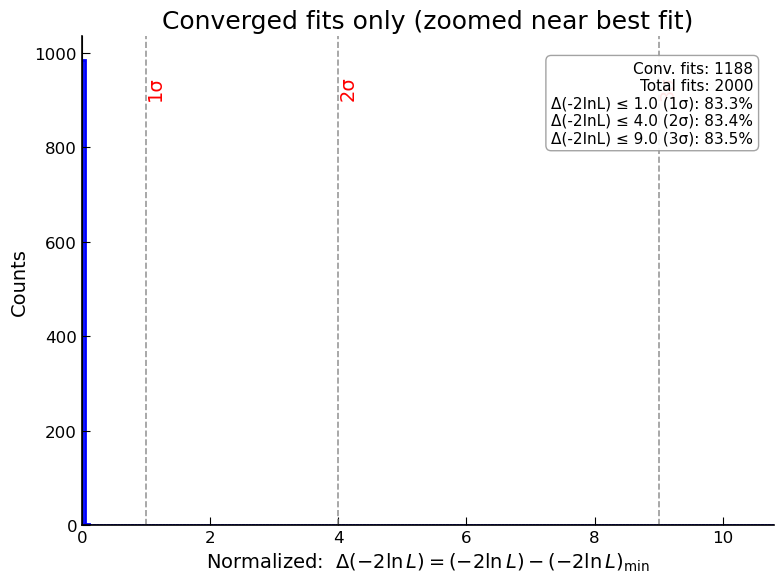

Number of fits exactly at Δ = 0: 919
Saved log-x PDF: /work/halld/home/dbarton/gluex/KShortPipLambda/sdme/plots/fit_loglikelihood_distribution_logx.pdf


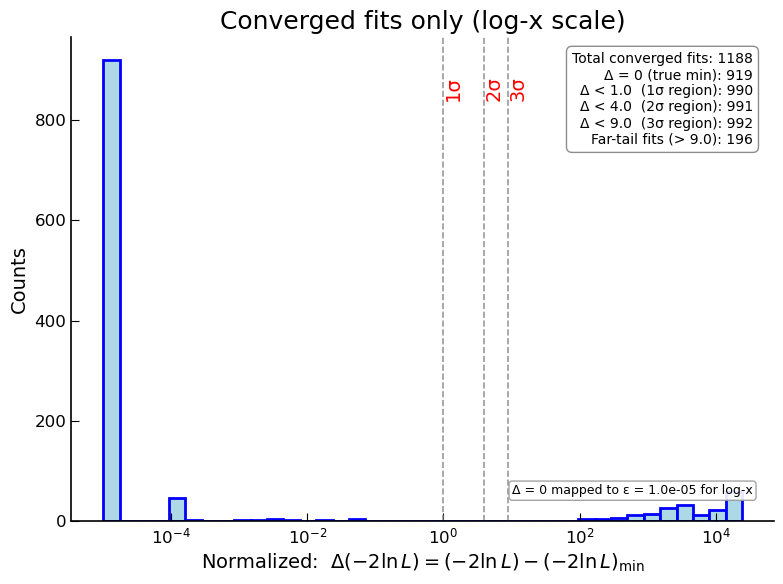

In [1]:
#!/usr/bin/env python3
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

baseDir  = "/work/halld/home/dbarton/gluex/KShortPipLambda/sdme/"
fileName = baseDir + "fits/fit_ranking.txt"
outFile  = baseDir + "fits/fit_ranking.xlsx"
pdfOut_linear = baseDir + "plots/fit_loglikelihood_distribution_zoom.pdf"
pdfOut_log    = baseDir + "plots/fit_loglikelihood_distribution_logx.pdf"

# -----------------------------
# GlueX style (for Matplotlib)
# -----------------------------
def gluex_style():
    mpl.rcParams["figure.figsize"] = (8.0, 6.0)
    mpl.rcParams["font.family"] = ["DejaVu Sans"]
    mpl.rcParams["font.size"] = 12
    mpl.rcParams["axes.titlesize"] = 18
    mpl.rcParams["axes.labelsize"] = 14
    mpl.rcParams["xtick.labelsize"] = 12
    mpl.rcParams["ytick.labelsize"] = 12
    mpl.rcParams["lines.linewidth"] = 2.0
    mpl.rcParams["axes.spines.top"] = False
    mpl.rcParams["axes.spines.right"] = False
    mpl.rcParams["axes.linewidth"] = 1.2
    mpl.rcParams["xtick.direction"] = "in"
    mpl.rcParams["ytick.direction"] = "in"
    mpl.rcParams["xtick.major.size"] = 6
    mpl.rcParams["ytick.major.size"] = 6
    mpl.rcParams["xtick.minor.size"] = 3
    mpl.rcParams["ytick.minor.size"] = 3
    mpl.rcParams["axes.grid"] = False

def set_gluex_margins(ax=None):
    plt.subplots_adjust(left=0.20, right=0.92, top=0.95, bottom=0.15)
    if ax is None:
        ax = plt.gca()
    ax.tick_params(which="both", direction="in")
    return ax

gluex_style()

# --- Read table ---
df = pd.read_csv(
    fileName,
    comment="#",
    sep=r"\s+",
    header=None,
    names=["RunNo", "Success", "FitStatus", "eMatrix", "LogL"],
    engine="python"
)

# Clean and convert data types
df["Success"]   = df["Success"].astype(str).str.strip().str.upper()
df["FitStatus"] = pd.to_numeric(df["FitStatus"], errors="coerce")
df["eMatrix"]   = pd.to_numeric(df["eMatrix"],   errors="coerce")
df["LogL"]      = pd.to_numeric(df["LogL"],      errors="coerce")
df = df.dropna(subset=["LogL"])

# Save DataFrame to Excel
os.makedirs(os.path.dirname(outFile), exist_ok=True)
df.to_excel(outFile, index=False)

# --- Filter to successful fits ---
df_filtered = df[df["Success"].str.startswith("Y")].copy()

if df_filtered.empty:
    print("No successful fits found after filtering (Success == 'Y').")
    print("Unique Success values:", pd.unique(df["Success"]))
    raise SystemExit

print(f"Number of successful fits: ({len(df_filtered)}/{len(df)}) "
      f"{len(df_filtered)/len(df)*100:.2f}%")

# --- Normalize log-likelihoods ---
# This is ΔlnL = lnL - lnL_min (or whatever your LogL represents)
min_logl = df_filtered["LogL"].min()
df_filtered["delta_LogL"] = df_filtered["LogL"] - min_logl
delta_logl = df_filtered["delta_LogL"]

print(f"Min LogL (used for normalization): {min_logl:.6f}")
print(f"Min ΔLogL = {delta_logl.min():.6f} (should be 0)")

# --- Likelihood-based "sigma" thresholds (Wilks) ---
# For one parameter:
# 1σ: ΔlnL = 0.5  (Δ(-2lnL) = 1)
# 2σ: ΔlnL = 2.0  (Δ(-2lnL) = 4)
# 3σ: ΔlnL = 4.5  (Δ(-2lnL) = 9)
# Likelihood-based "sigma" thresholds (Wilks) for -2 ln L
thresholds = {
    "1σ": 1.0,   # Δ(-2 ln L) = 1
    "2σ": 4.0,   # Δ(-2 ln L) = 4
    "3σ": 9.0,   # Δ(-2 ln L) = 9
}


frac_1 = (delta_logl <= thresholds["1σ"]).mean() * 100.0
frac_2 = (delta_logl <= thresholds["2σ"]).mean() * 100.0
frac_3 = (delta_logl <= thresholds["3σ"]).mean() * 100.0

print(f"Fraction with Δ(-2lnL) ≤ {thresholds['1σ']:.1f} (1σ): {frac_1:.2f}%")
print(f"Fraction with Δ(-2lnL) ≤ {thresholds['2σ']:.1f} (2σ): {frac_2:.2f}%")
print(f"Fraction with Δ(-2lnL) ≤ {thresholds['3σ']:.1f} (3σ): {frac_3:.2f}%")


# =====================================================
# 1) ZOOMED LINEAR PLOT (interesting region near Δ(-2lnL)=0)
# =====================================================
fig, ax = plt.subplots(figsize=(8, 6))
set_gluex_margins(ax)

# Zoom range: a bit beyond 3σ in Wilks sense
xmax_zoom = max(5.0, thresholds["3σ"] * 1.2)
# xmax_zoom = 1.2

# Use only points in the zoom window for the histogram
delta_logl_zoom = delta_logl[delta_logl <= xmax_zoom]

ax.hist(
    delta_logl_zoom,
    bins=200,
    range=(0.0, xmax_zoom),
    edgecolor="blue",
    facecolor="lightblue",
    linewidth=2.0,
    density=False,
)

# Line at the best fit
ax.axvline(0.0, color="black", linestyle="-", linewidth=1.5,
           label=r"Best fit ($\Delta(-2\ln L) = 0$)")

ymax = ax.get_ylim()[1]

# Draw Wilks thresholds as vertical lines (for Δ(-2 ln L))
for label, xval in thresholds.items():
    ax.axvline(xval, color="gray", linestyle="--", linewidth=1.2, alpha=0.8)
    ax.text(
        xval, ymax * 0.92, label,
        rotation=90, ha="left", va="top",
        fontsize=14, color="red"
    )

ax.set_xlim(0.0, xmax_zoom)

# Fractions already computed with thresholds = {1σ:1, 2σ:4, 3σ:9}
text = (
    f"Conv. fits: {len(df_filtered)}\n"
    f"Total fits: {len(df)}\n"
    f"Δ(-2lnL) ≤ {thresholds['1σ']:.1f} (1σ): {frac_1:.1f}%\n"
    f"Δ(-2lnL) ≤ {thresholds['2σ']:.1f} (2σ): {frac_2:.1f}%\n"
    f"Δ(-2lnL) ≤ {thresholds['3σ']:.1f} (3σ): {frac_3:.1f}%"
)

ax.text(
    0.97, 0.95, text,
    transform=ax.transAxes,
    ha="right", va="top",
    fontsize=11,
    bbox=dict(boxstyle="round,pad=0.35",
              facecolor="white",
              alpha=0.9,
              edgecolor="0.6")
)

ax.set_xlabel(r"Normalized:  $\Delta(-2\ln L) = (-2\ln L) - (-2\ln L)_{\min}$")
ax.set_ylabel("Counts")
ax.set_title("Converged fits only (zoomed near best fit)")

plt.tight_layout()
os.makedirs(os.path.dirname(pdfOut_linear), exist_ok=True)
plt.savefig(pdfOut_linear)
print(f"Saved zoomed PDF: {pdfOut_linear}")
plt.show()


# =====================================
# 2) LOG-X PLOT (full range, including Δ = 0)
# =====================================
fig, ax = plt.subplots(figsize=(8, 6))
set_gluex_margins(ax)

# Count how many are exactly at the minimum
n_at_min = (delta_logl == 0).sum()
print(f"Number of fits exactly at Δ = 0: {n_at_min}")

# For plotting on a log-x axis, map Δ=0 to a small positive epsilon
delta_logl_plot = delta_logl.copy()

# If there are any positive values, choose eps a decade below the smallest positive;
# otherwise just set a tiny fixed eps.
positive = delta_logl_plot[delta_logl_plot > 0]
if len(positive) > 0:
    eps = max(positive.min() / 10.0, 1e-8)
else:
    eps = 1e-8

delta_logl_plot[delta_logl_plot == 0] = eps

# Now make log-spaced bins from eps up to the max
bins = np.logspace(
    np.log10(eps),
    np.log10(delta_logl_plot.max()),
    40
)

ax.hist(
    delta_logl_plot,
    bins=bins,
    edgecolor="blue",
    facecolor="lightblue",
    linewidth=2.0,
    density=False,
)

ax.set_xscale("log")

# Mark Wilks thresholds for Δ(-2 ln L)
for label, xval in thresholds.items():
    ax.axvline(xval, color="gray", linestyle="--", linewidth=1.2, alpha=0.8)
    ax.text(
        xval, ax.get_ylim()[1] * 0.92, label,
        rotation=90, ha="left", va="top",
        fontsize=14, color="red"
    )

ax.set_xlabel(r"Normalized:  $\Delta(-2\ln L) = (-2\ln L) - (-2\ln L)_{\min}$")
ax.set_ylabel("Counts")
ax.set_title("Converged fits only (log-x scale)")

# ---- Useful summary info for the log-x plot ----
N_total = len(delta_logl)
N_zero  = n_at_min

N_1sig = (delta_logl <= thresholds["1σ"]).sum()
N_2sig = (delta_logl <= thresholds["2σ"]).sum()
N_3sig = (delta_logl <= thresholds["3σ"]).sum()

text_log = (
    f"Total converged fits: {N_total}\n"
    f"Δ = 0 (true min): {N_zero}\n"
    f"Δ < {thresholds['1σ']:.1f}  (1σ region): {N_1sig}\n"
    f"Δ < {thresholds['2σ']:.1f}  (2σ region): {N_2sig}\n"
    f"Δ < {thresholds['3σ']:.1f}  (3σ region): {N_3sig}\n"
    f"Far-tail fits (> {thresholds['3σ']:.1f}): {N_total - N_3sig}"
)

ax.text(
    0.97, 0.97, text_log,
    transform=ax.transAxes,
    ha="right", va="top",
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.4",
              facecolor="white",
              alpha=0.9,
              edgecolor="0.5")
)

# Annotate how we treated Δ = 0
eps_text = f"Δ = 0 mapped to ε = {eps:.1e} for log-x"
ax.text(
    0.97, 0.05, eps_text,
    transform=ax.transAxes,
    ha="right", va="bottom",
    fontsize=9,
    bbox=dict(boxstyle="round,pad=0.25",
              facecolor="white",
              alpha=0.9,
              edgecolor="0.6")
)

plt.tight_layout()
os.makedirs(os.path.dirname(pdfOut_log), exist_ok=True)
plt.savefig(pdfOut_log)
print(f"Saved log-x PDF: {pdfOut_log}")
plt.show()


# debugging
# print(delta_logl.min(), delta_logl.nsmallest(10))


